In [4]:
%load_ext autoreload
%autoreload 2

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import os

%matplotlib inline
plt.style.use('ggplot')
sns.set(style="darkgrid")

In [8]:
path = pathlib.Path('../out/experiment/decode-state-diff/decode-state-diff_s20200103')

In [29]:
df = pd.read_csv(path/'progress.txt', sep='\t')
df.head()

,Epoch,AverageTrainLoss,StdTrainLoss,MaxTrainLoss,MinTrainLoss,AverageValidLoss,StdValidLoss,MaxValidLoss,MinValidLoss
0,1,0.004273,0.000661,0.007837,0.002824,0.003530,0.000180,0.004117,0.003161
1,2,0.003258,0.000328,0.004414,0.002339,0.002950,0.000140,0.003339,0.002656
2,3,0.002774,0.000244,0.003850,0.001935,0.002550,0.000121,0.002876,0.002317
3,4,0.002493,0.000192,0.003259,0.001856,0.002404,0.000116,0.002698,0.002179
4,5,0.002334,0.000174,0.002981,0.001774,0.002282,0.000111,0.002562,0.002078


In [57]:
def plot_mean_std(data, log=False, figsize=(8, 6)):
    plt.figure(figsize=figsize)
    for x, mean, std in data:
        name = mean.name
        x, mean, std = x.to_numpy(), mean.to_numpy(), std.to_numpy()
        plt.plot(x, mean, label=name)
        plt.fill_between(x, mean - std, mean + std, alpha=0.3)
    plt.legend(loc=0)
    if log:
        plt.loglog()
    plt.show()

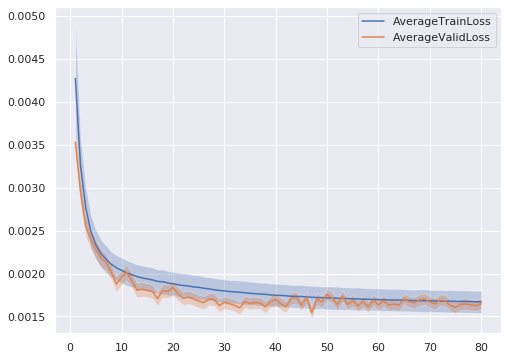

In [58]:
plot_mean_std([
    (df.Epoch, df.AverageTrainLoss, df.StdTrainLoss),
    (df.Epoch, df.AverageValidLoss, df.StdValidLoss)])